# **Resolução do case - Analista de Dados**

### Este documento traz uma análise exploratório de caráter descritivo dos dados inerentes ao uso da ferramenta 'listas nominais', sendo esta a principal ferramenta do impulso previne. 
### O impulso previne é uma solução digital para a gestão dos dados de atenação primária em saúde (APS) , a qual centraliza em uma plataforma dados, análises e recomendações sobre o programa de financiamento federal da Atenção Primária. 


## **O presente documento está dividido em três blocos** : 

 * Data Wrangling :  Tratamento dos dados 
 * Analytics: Análise descritiva dos dados 
 * Visualization: Visuzalização dos dados em gráficos.

## **Utilizamos a linguagem de programação python com auxílio de bibliotecas para análises de dados, sendo estas**:  

* Pandas: https://pandas.pydata.org/docs/
* Numpy: https://numpy.org/doc/
* Matplotlib: https://matplotlib.org/stable/index.html
* Seaborn: https://seaborn.pydata.org/

### Importação das bibliotecas necessárias para a análise

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# 1 - **Data Wrangling**

### Base de dados: Usuários cadastrados

Para a leitura da base de dados, utilizamos o comando *pd.read_csv()*

In [5]:
users_registered = pd.read_csv('data/usuarios_cadastrados_ip.csv', header = 0, sep=',')

visualização das colunas presentes no dataframe utilizando o atributo *df.columns*. 

Desta forma, percebemos que o dataframe contém as seguintes colunas: 

* **'usuario_id'**:            identificador único do usuário
* **'municipio'**:             município do usuário
* **'cargo'**:                 cargo ocupado pelo usuário
* **'data_criacao_cadastro'**: data de criação do cadastro do usuário

In [6]:
users_registered.columns

Index(['usuario_id', 'municipio', 'cargo', 'data_criacao_cadastro'], dtype='object')

Para visualizar a quantidade de registros no dataset de usuários cadastrados, utilizando o comando *len(df)*, este, por sua vez é um comando nativo do python que nos permite obter a quantidade de itens presentes em um objeto do tipo lista.

Ao aplicarmos o comando, percebemos que o nosso dataframe de usuários cadastrados possui **695 registros**.

In [7]:
len(users_registered)

695

É de grande importância verificar a presença de duplicadas num dataset, desta forma utilizamos o comando df.duplicated() da biblioteca pandas para tal análise.

In [8]:
users_registered.duplicated().sum()

0

visualização dos cinco primeiros e cinco últimos registros do dataset de usuários cadastrados, para verificar os tipos de dados e consistência destes na base de dados.  

Para isto, utilizamos os comandos *df.head()* e *df.tail()*

In [9]:
users_registered.head()

,usuario_id,municipio,cargo,data_criacao_cadastro
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023
1,877b90f4-d597-4348-a2e7-e29c4f3b3f4e,Marechal Thaumaturgo - AC,Coordenação APS,24/10/2023
2,83d92bea-1688-4fb0-8332-b9e54d97d3ec,Jacobina - BA,Coordenação de Equipe,4/4/2023
3,62009c46-5bb3-43d0-b510-18bf0a176bab,Santa Luz - PI,Coordenação de Equipe,25/5/2023
4,91e21d61-6a57-4e85-9d6b-b009bc677e59,Brejo de Areia - MA,Coordenação de Equipe,29/8/2023


In [10]:
users_registered.tail()

,usuario_id,municipio,cargo,data_criacao_cadastro
690,a9fbb9f8-348d-468c-a109-2f5bf6b9706c,Jucuruçu - BA,Coordenação APS,25/10/2023
691,462377af-9eda-4aa2-ac24-82af7f3add53,Inhambupe - BA,Coordenação APS,17/11/2023
692,524fa2c4-dca9-4704-a25f-bcdd2e78389c,Paulo Ramos - MA,Coordenação de Equipe,25/3/2024
693,1fb0a0b8-012d-45d6-9908-6d31325929a6,Jaguapitã - PR,Coordenação APS,9/2/2023
694,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024


### Base de dados: Dias ativos dos usuários

Utilizamos novamente o comando *pd.read_csv()* para a leitura da base de dados inerente aos dias ativos dos usuários. 

In [11]:
active_days = pd.read_csv('data/dias_ativo_usuarios_ip.csv', header=0, sep=',')

Aqui realizamos novamente a verificação das colunas presentes no dataset, através do atributo **df.columns**. 

Com este, percebemos que o dataset possui as seguintes colunas: 

* **'usuario_id'** :  identificador único do usuário
* **'data_ativo'** :  data de atividade do usuário
* **'acessou_listas_nominais'** : booleano, sendo verdadeiro (true) se o usuário acessou pelo menos uma lista nominal.
* **'clicks_imprimir_lista'** :  nº de click para realizar a impressão de uma lista nominal
* **'clicks_filtrar_lista'** : nº de clicks para aplicar um filtro na lista nominal

In [12]:
active_days.columns

Index(['usuario_id', 'data_ativo', 'acessou_listas_nominais',
       'clicks_imprimir_lista', 'clicks_filtrar_lista'],
      dtype='object')

Novamente, utilizamos o comando *len(df)* para verificar a quantidade de registros no dataset inerente aos dias ativos dos usuários. 

Através deste percebemos que o dataset possui **20777** registros. Sendo consideravelmente maior do que o dataframe de usuários registrados, demonstrando assim que há monitoramento considerável da atividade dos usuários na plataforma, o que nos permite realizar uma análise de dados eficiente.

In [13]:
len(active_days)

20777

Apenas para vislumbre dos dados, seus tipos e consistências, utilizamos novamente os comandos *df.head()* e *df.tail()* para verificação dos cinco primeiros e cinco últimos registros presentes no dataset.

In [14]:
active_days.head()

,usuario_id,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
0,dec6bb91-05a8-4709-a7af-ab2aba6d1f3e,18/12/2023,True,0,0
1,0a83d262-3630-41a5-b36f-a48ebe9f80e2,18/12/2023,True,0,0
2,7da4250a-920f-495d-a2b9-7a1be1461afa,19/12/2023,True,0,0
3,269a5879-68d8-495b-9499-ead6c7809af5,24/12/2023,True,0,0
4,c84b7864-06ad-42bc-bdce-b6090042e0d9,3/1/2024,True,0,0


In [15]:
active_days.tail()

,usuario_id,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
20772,cb58836c-062a-45fe-af65-fd69b272979e,24/10/2023,True,0,0
20773,e236ca92-7a08-4798-a116-e02ee4409cfe,11/5/2023,True,0,0
20774,0d7d8216-15ff-4f1a-a91f-ea4bd6e500a0,23/10/2024,True,0,0
20775,d825e410-b243-4c61-818b-d849c8c93dbb,15/10/2024,False,0,0
20776,bea210a5-925b-47ed-ae71-38cfa6e74467,30/7/2024,True,0,0


Por padrão, verificamos a presença de duplicatas no dataset e percebemos a ausência de duplicatas. 

In [16]:
active_days.duplicated().sum()

0

## União das bases de dados

Sabendo que possuimos bases de dados distintas, mas que apontam para um mesmo objetivo, entendemos que há possibilidade de união dos datasets o que foi realizando utilizando a técnida de união de dados *inner join*, onde tal união foi realizada com bases nos id's dos usuários cadastrados e presentes na base de dados dos dias ativos.

A lógica segue a mesma aplicação do método *inner join*, comum em bancos de dados SQL  

Para tal, utilizamos o comando *pd.merge()*

In [17]:
merged_bases =pd.merge(users_registered, active_days,how='inner', on="usuario_id")

In [18]:
merged_bases

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,11/8/2023,True,0,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,14/2/2024,True,0,2
2,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,13/12/2023,True,0,0
3,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,5/9/2023,True,0,0
4,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,23/11/2023,True,0,0
...,...,...,...,...,...,...,...,...
20772,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,15/4/2024,True,0,1
20773,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,17/4/2024,True,0,0
20774,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,28/8/2024,True,0,0
20775,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,4/11/2024,True,0,1


Verificamos a quantidade de dados presente na base de dados e unida, e esta possui **20777 registros**.

In [19]:
len(merged_bases)

20777

Analisamos a consistência dos dados, utilizando novamente os comandos df.head() e df.tail()

In [20]:
merged_bases.head()

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,11/8/2023,True,0,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,14/2/2024,True,0,2
2,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,13/12/2023,True,0,0
3,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,5/9/2023,True,0,0
4,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,23/11/2023,True,0,0


In [21]:
merged_bases.tail()

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
20772,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,15/4/2024,True,0,1
20773,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,17/4/2024,True,0,0
20774,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,28/8/2024,True,0,0
20775,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,4/11/2024,True,0,1
20776,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,14/5/2024,True,0,0


In [22]:
merged_bases.loc[merged_bases['acessou_listas_nominais'] == bool('True')]

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,11/8/2023,True,0,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,14/2/2024,True,0,2
2,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,13/12/2023,True,0,0
3,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,5/9/2023,True,0,0
4,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,23/3/2023,23/11/2023,True,0,0
...,...,...,...,...,...,...,...,...
20772,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,15/4/2024,True,0,1
20773,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,17/4/2024,True,0,0
20774,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,28/8/2024,True,0,0
20775,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,21/2/2024,4/11/2024,True,0,1


Visando realizar a verificação futura dos dados do tipo "data", fizemos a conversão das variáveis do tipo data para o formato date, seguindo os comandos abaixo.  

O comando *pd.to_datetime()* foi utilizado para converter as variáveis data_criacao_Cadastro e data_ativo para o formato data, e utilizamos o parâmetro dayfirst=True, para estabelecer que desejamos o padrão Ano/Mês/Dia (yyyy/mm/dd).

In [23]:
merged_bases['data_criacao_cadastro'] = pd.to_datetime(merged_bases['data_criacao_cadastro'], dayfirst=True)
merged_bases['data_ativo'] = pd.to_datetime(merged_bases['data_ativo'], dayfirst=True)

In [24]:
merged_bases

,usuario_id,municipio,cargo,data_criacao_cadastro,data_ativo,acessou_listas_nominais,clicks_imprimir_lista,clicks_filtrar_lista
0,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-08-11,True,0,0
1,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2024-02-14,True,0,2
2,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-12-13,True,0,0
3,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-09-05,True,0,0
4,a034d9fc-d54a-4a89-bdef-2e596af3a856,São Roque - SP,Coordenação de Equipe,2023-03-23,2023-11-23,True,0,0
...,...,...,...,...,...,...,...,...
20772,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,2024-02-21,2024-04-15,True,0,1
20773,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,2024-02-21,2024-04-17,True,0,0
20774,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,2024-02-21,2024-08-28,True,0,0
20775,8e1f3b8a-ff3b-4712-ad5d-7cb3e3f1271c,Pacoti - CE,Coordenação de Equipe,2024-02-21,2024-11-04,True,0,1


Ao final do tratamento, realizamos o salvamento da base unida para possíveis finalidades futuras, utilizando o comando
*df.to_parquet()*, o salvamento em formato parquet foi feito visando a otimização do volume de dados. 

Para mais conhecimentos sobre o formato parquet: https://parquet.apache.org/docs/

In [25]:
merged_bases.to_parquet('merged_dataset/merged_datasets_registry_days_of_access',compression='gzip')

# Analytics 

## 1 Análise da taxa de primeiro acesso às listas nominais

Para a análise da taxa de primeiro acesso às listas nominais, utilizamos o código abaixo, o qual consiste em: 

* Obtenção dos usuários totais e distintos presentes na base de dados unida.
* Filtragem dos usuários que possuem status de acesso "verdadeiro".
* Cálculo da taxa.

O cálculo da taxa se dá, ao dividirmos o montante de usuários que acessou a base pela quantidade total de usuários distintos na base e multiplicarmos o resultado por cem (visto que objetivamos um valor do tipo taxa).   

Como resultado, percebemos a **taxa de acesso expressivamente alta, aproximadamente: 98.260**, o que indica alta adesão inicial à ferramenta. 

In [26]:
total_users = merged_bases['usuario_id'].nunique()
users_accessed = merged_bases[merged_bases['acessou_listas_nominais'] == True]['usuario_id'].nunique()
access_rate = (users_accessed / total_users) * 100

access_rate

98.26086956521739

# 2 - Análise da atividade entre os diferentes perfis profissionais de usuários.  

Para esta análise foi necessário o agrupamento dos dados por tipo de profissão, dado presente na variável "cargo". 
Além disso, foi necessário realizar a agregação do tipo soma, dos dados inerentes a quantidade de cliques para imprimir listas e para filtrar listas. 

Com isso, obtemos um conjunto de dados agregado, contemplando os dados: 

* tipo de cargo
* quantidade de usuários distintos por tipo de cargo
* quantidade de cliques para filtrar lista
* quantidade de cliques para imprimir lista. 

Os resultados indicam maior uso bruto por usuários em cargos de "coordenação de equipe", porém, é importante ressaltar que estes usuários são mais numerosos na base de dados, isto fica evidente ao compararmos o número de usuários distintos entre os cargos, onde temos 100 usuários com cargo do tipo coordenação APS, contra 475 usuários do tipo coordenação Equipe.

De maneira geral, podemos afirmar maior engajamento total para os usuários de coordenação de quipe: 
* Coordenação APS: 9345 cliques
* Coordenação de equipes: 16276 cliques

PS: É importante ter em mente que a quantidade de cliques se mostra uma métrica positiva ao tratarmos dos cliques diretamente no botão referente ao processo de impressão ou filtragem. 
Abordagens em relação a quantidade de cliques podem trazer também evidências de dificuldade de uso de uma determinada ferramenta, onde muitos cliques em diferentes regiões da tela podem indicar dificuldade de uso. 

In [27]:
activity_by_cargo = merged_bases.groupby('cargo').agg(
    total_clicks_imprimir=('clicks_imprimir_lista', 'sum'),
    total_clicks_filtrar=('clicks_filtrar_lista', 'sum'),
    unique_users=('usuario_id', 'nunique')
).reset_index()

In [28]:
activity_by_cargo['total_engagement'] = activity_by_cargo['total_clicks_imprimir'] + activity_by_cargo['total_clicks_filtrar']
activity_by_cargo_sorted = activity_by_cargo.sort_values('total_engagement', ascending=False)  


# exaltas a importância das proporções
activity_by_cargo['proportion'] = (activity_by_cargo['total_engagement']/activity_by_cargo['unique_users'])

In [29]:
activity_by_cargo

,cargo,total_clicks_imprimir,total_clicks_filtrar,unique_users,total_engagement,proportion
0,Coordenação APS,2760,6585,100,9345,93.450000
1,Coordenação de Equipe,6916,9360,475,16276,34.265263


Text(0, 0.5, 'Total de engajamento')

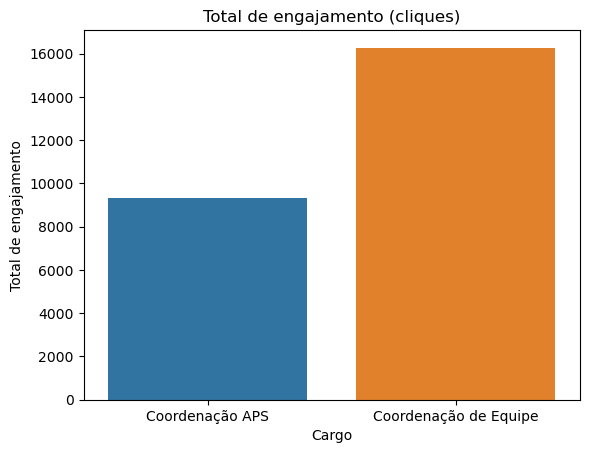

In [30]:
sns.barplot(activity_by_cargo, x='cargo', y='total_engagement', hue='cargo')
plt.title('Total de engajamento (cliques)')
plt.xlabel('Cargo')
plt.ylabel('Total de engajamento')

geração de gráfico de barras para comparação da quantidade de cliques entre perfis de usuários.

# 3 - Padrões de uso individualizados por usuário.  

Para esta análise foi necessário o agrupamento dos dados por usuário, dado presente na variável "usuario_id". 

Além disso, foi necessário realizar a agregação do tipo soma, dos dados inerentes ao acesso as listas nominais, quantidade de cliques para imprimir listas e para filtrar listas. 

Com isso, obtemos um conjunto de dados agregado, contemplando os dados: 

* usuário.
* quantidade de acessos.
* quantidade de cliques para filtrar lista.
* quantidade de cliques para imprimir lista.

De maneira óbvia, percebemos que os usuários tendem a cliar mais nos filtros do que nas impressões, visto que a aplicação de filtros é fundamental nos processos analíticos. Temos os seguintes resultados: 

* 9676 cliques para impressão.
* 15945 cliques para filtros.

Os resultados acima podem indicar a usabilidade da plataforma sem a necessidade de impressão dos relatórios, demonstrando a alta capacidade de visualização presente no portal. Outros fatores precisam estar unidos para a verificação mais acurada destes dados, um destes pode ser o tempo de uso total por sessão logada.

In [31]:
usage_patterns = merged_bases.groupby('usuario_id').agg(
    total_accesses=('acessou_listas_nominais', 'sum'),
    total_clicks_imprimir=('clicks_imprimir_lista', 'sum'),
    total_clicks_filtrar=('clicks_filtrar_lista', 'sum')
).reset_index()

In [32]:
usage_patterns

,usuario_id,total_accesses,total_clicks_imprimir,total_clicks_filtrar
0,0077e9df-39d3-41bc-aa57-3953e894bcf9,37,18,55
1,009a2ef8-ee98-4c4d-b53a-6407abc03715,2,3,0
2,0103a1d1-96c8-4d98-b263-0549294aff13,5,0,14
3,013e6d7a-4b86-47a3-972e-4c046dc4903b,97,39,110
4,021f43b9-c167-44b3-bc42-5420212df999,3,0,0
...,...,...,...,...
570,feb83ec6-80af-4e84-a3dd-78a6e94964ef,24,0,0
571,fed22165-9980-4358-a2cf-11c427109931,8,0,0
572,fef05bde-262a-4edf-bc6a-dc0ff74ac59e,6,30,22
573,ff217f06-a074-411d-b969-8d8693ca3c82,15,1,1


In [33]:
usage_patterns['total_clicks_imprimir'].sum()

9676

In [34]:
usage_patterns['total_clicks_filtrar'].sum()

15945

# 4 Análise de sazonalidade

Objetivamos analisar se há sazonalidade nos dados, ou seja, se estes esboçam um padrão temporal que possa vir a ser interpretado mediante algum evento inerente ao conjunto de dados e ou disponibilidade destes.

Para isto foi necessário tratarmos os dados do tipo "data" para a interpretação computacional adequada, e buscar por relação com a quantidade de cliques por meses.

In [35]:
merged_bases['data_ativo'] = pd.to_datetime(merged_bases['data_ativo'], errors='coerce')
merged_bases['month'] = merged_bases['data_ativo'].dt.month

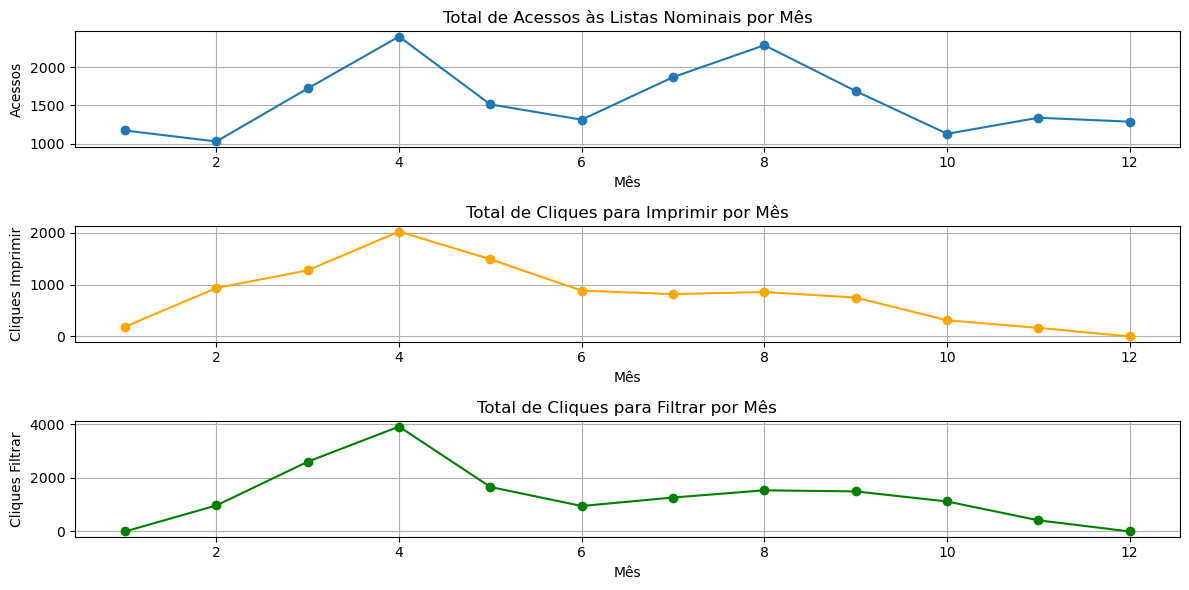

In [36]:
seasonal_engagement = merged_bases.groupby('month').agg(
    total_accesses=('acessou_listas_nominais', 'sum'),
    total_clicks_imprimir=('clicks_imprimir_lista', 'sum'),
    total_clicks_filtrar=('clicks_filtrar_lista', 'sum')
).reset_index() 

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(seasonal_engagement['month'], seasonal_engagement['total_accesses'], marker='o')
plt.title('Total de Acessos às Listas Nominais por Mês')
plt.xlabel('Mês')
plt.ylabel('Acessos')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(seasonal_engagement['month'], seasonal_engagement['total_clicks_imprimir'], marker='o', color='orange')
plt.title('Total de Cliques para Imprimir por Mês')
plt.xlabel('Mês')
plt.ylabel('Cliques Imprimir')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(seasonal_engagement['month'], seasonal_engagement['total_clicks_filtrar'], marker='o', color='green')
plt.title('Total de Cliques para Filtrar por Mês')
plt.xlabel('Mês')
plt.ylabel('Cliques Filtrar')
plt.grid(True)

plt.tight_layout()
plt.show()
